In [1]:
import pandas as pd
colnames =['ID', 'Class', 'Gender (X1)', 'Status IMT (X2)', 'Berkacamata (X3)', 'Pernah Sakit (X4)', 'Gangguan Psikis (X5)', 'Aktif Bertanya (X6)','Aktif Menjawab (X7)', 'Mengerjakan Tugas (X8)', 'Tertarik Materi (X9)', 'Alokasi Jam Belajar (X10)', 'Memiliki Referensi Tambahan (X11)', 'Browsing dan Youtube (X12)', 'Mengulang Materi (X13)', 'Praktek Mandiri (X14)', 'Berdiskusi (X15)', 'Memiliki HP (X16)', 'Memiliki Laptop (X17)', 'Kecukupan Kuota (X18)', 'Dukungan Suasana rumah (X19)', 'PLN (X20)', 'Lokasi (X21)', 'Ketersediaan Sinyal (X22)']
df=pd.read_csv('../resource/academic.csv',names=colnames)
df.head(3)

,ID,Class,Gender (X1),Status IMT (X2),Berkacamata (X3),Pernah Sakit (X4),Gangguan Psikis (X5),Aktif Bertanya (X6),Aktif Menjawab (X7),Mengerjakan Tugas (X8),...,Mengulang Materi (X13),Praktek Mandiri (X14),Berdiskusi (X15),Memiliki HP (X16),Memiliki Laptop (X17),Kecukupan Kuota (X18),Dukungan Suasana rumah (X19),PLN (X20),Lokasi (X21),Ketersediaan Sinyal (X22)
0,1,0,P,NORMAL,Tidak,Tidak,Tidak,Ya,Ya,Semua,...,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Tidak,Kadang-kadang,Ya,Pedesaan,Sebagian
1,2,2,L,GEMUK,Ya,Tidak,Tidak,Tidak,Tidak,Semua,...,Kadang-kadang,Kadang-kadang,Tidak,Ya,Ya,Ya,Ya,Ya,Perkotaan,Ya
2,3,2,P,NORMAL,Ya,Tidak,Tidak,Tidak,Tidak,Semua,...,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Ya,Ya,Ya,Perkotaan,Sebagian


In [2]:
col =['Gender (X1)', 'Status IMT (X2)', 'Berkacamata (X3)', 'Pernah Sakit (X4)', 'Gangguan Psikis (X5)', 'Aktif Bertanya (X6)','Aktif Menjawab (X7)', 'Mengerjakan Tugas (X8)', 'Tertarik Materi (X9)', 'Alokasi Jam Belajar (X10)', 'Memiliki Referensi Tambahan (X11)', 'Browsing dan Youtube (X12)', 'Mengulang Materi (X13)', 'Praktek Mandiri (X14)', 'Berdiskusi (X15)', 'Memiliki HP (X16)', 'Memiliki Laptop (X17)', 'Kecukupan Kuota (X18)', 'Dukungan Suasana rumah (X19)', 'PLN (X20)', 'Lokasi (X21)', 'Ketersediaan Sinyal (X22)']
academic_df_dummies = pd.get_dummies(df, prefix=col)
print(academic_df_dummies)

    ID  Class  Gender (X1)_L  Gender (X1)_P  Status IMT (X2)_GEMUK  \
0    1      0              0              1                      0   
1    2      2              1              0                      1   
2    3      2              0              1                      0   
3    4      2              0              1                      0   
4    5      0              0              1                      0   
..  ..    ...            ...            ...                    ...   
86  87      1              1              0                      0   
87  88      2              1              0                      0   
88  89      0              1              0                      0   
89  90      1              1              0                      0   
90  91      2              1              0                      0   

    Status IMT (X2)_KURUS  Status IMT (X2)_NORMAL  Status IMT (X2)_OBESITAS  \
0                       0                       1                         0   
1

In [3]:
X=academic_df_dummies.drop(['Class'],axis=1)
y=academic_df_dummies['Class']

In [4]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [5]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini")
# print(X_test)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6071428571428571


DecisionTreeClassifier()


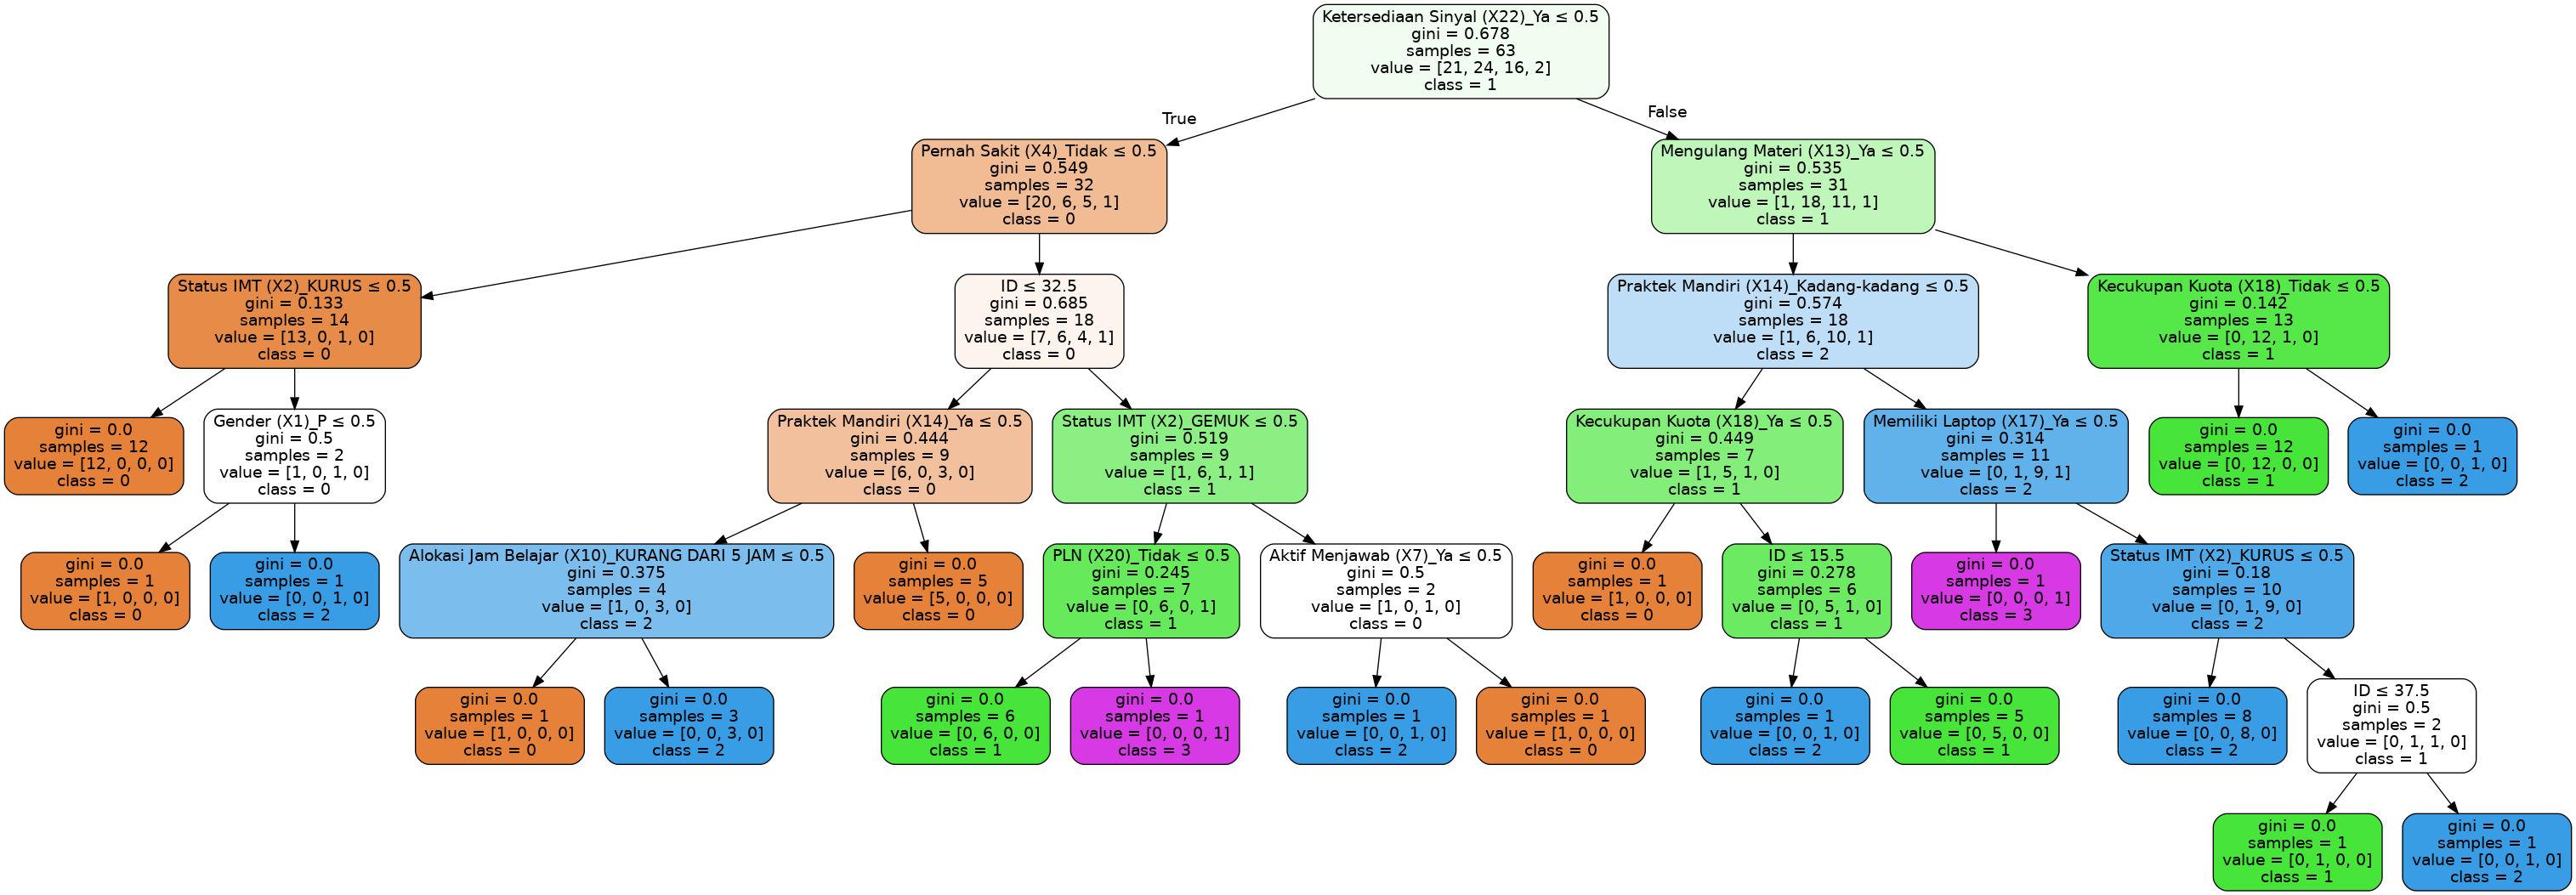

In [6]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
# feature_name= 'ID', 'Gender (X1)_0', 'Gender (X1)_1', 'Status IMT (X2)_0', 'Status IMT (X2)_1', 'Status IMT (X2)_2', 'Berkacamata (X3)_0', 'Berkacamata (X3)_1', 'Pernah Sakit (X4)_0', 'Pernah Sakit (X4)_1', 'Gangguan Psikis (X5)_0', 'Gangguan Psikis (X5)_1', 'Aktif Bertanya (X6)_0', 'Aktif Bertanya (X6)_1', 'Aktif Menjawab (X7)_0', 'Aktif Menjawab (X7)_1', 'Mengerjakan Tugas (X8)_0', 'Mengerjakan Tugas (X8)_1', 'Tertarik Materi (X9)_0', 'Tertarik Materi (X9)_1', 'Tertarik Materi (X9)_2', 'Alokasi Jam Belajar (X10)_0', 'Alokasi Jam Belajar (X10)_1', 'Alokasi Jam Belajar (X10)_2', 'Memiliki Referensi Tambahan (X11)_0', 'Memiliki Referensi Tambahan (X11)_1', 'Browsing dan Youtube (X12)_0', 'Browsing dan Youtube (X12)_1', 'Mengulang Materi (X13)_0', 'Mengulang Materi (X13)_1', 'Praktek Mandiri (X14)_0', 'Praktek Mandiri (X14)_1', 'Berdiskusi (X15)_0', 'Berdiskusi (X15)_1', 'Berdiskusi (X15)_2', 'Memiliki HP (X16)_0', 'Memiliki HP (X16)_1', 'Memiliki Laptop (X17)_0', 'Memiliki Laptop (X17)_1', 'Kecukupan Kuota (X18)_0', 'Kecukupan Kuota (X18)_1', 'Kecukupan Kuota (X18)_2', 'Dukungan Suasana rumah (X19)_0', 'Dukungan Suasana rumah (X19)_1', 'Dukungan Suasana rumah (X19)_2', 'PLN (X20)_0', 'PLN (X20)_1', 'Lokasi (X21)_0', 'Lokasi (X21)_1', 'Lokasi (X21)_2', 'Ketersediaan Sinyal (X22)_0', 'Ketersediaan Sinyal (X22)_1', 'Ketersediaan Sinyal (X22)_2'
feature_named = 'ID', 'Gender (X1)_L', 'Gender (X1)_P', 'Status IMT (X2)_GEMUK', 'Status IMT (X2)_KURUS', 'Status IMT (X2)_NORMAL', 'Status IMT (X2)_OBESITAS', 'Berkacamata (X3)_Tidak', 'Berkacamata (X3)_Ya', 'Pernah Sakit (X4)_Tidak', 'Pernah Sakit (X4)_Ya', 'Gangguan Psikis (X5)_Tidak', 'Gangguan Psikis (X5)_Ya', 'Aktif Bertanya (X6)_Tidak', 'Aktif Bertanya (X6)_Ya', 'Aktif Menjawab (X7)_Tidak', 'Aktif Menjawab (X7)_Ya', 'Mengerjakan Tugas (X8)_Sebagian', 'Mengerjakan Tugas (X8)_Semua', 'Tertarik Materi (X9)_Mungkin', 'Tertarik Materi (X9)_Tidak', 'Tertarik Materi (X9)_Ya', 'Alokasi Jam Belajar (X10)_ANTARA 5 - 10 JAM', 'Alokasi Jam Belajar (X10)_KURANG DARI 5 JAM', 'Alokasi Jam Belajar (X10)_LEBIH DARI 10 JAM', 'Memiliki Referensi Tambahan (X11)_Ada', 'Memiliki Referensi Tambahan (X11)_Tidak Ada', 'Browsing dan Youtube (X12)_Tidak', 'Browsing dan Youtube (X12)_Ya', 'Mengulang Materi (X13)_Kadang-kadang', 'Mengulang Materi (X13)_Ya', 'Praktek Mandiri (X14)_Kadang-kadang', 'Praktek Mandiri (X14)_Ya', 'Berdiskusi (X15)_Kadang-kadang', 'Berdiskusi (X15)_Tidak', 'Berdiskusi (X15)_Ya', 'Memiliki HP (X16)_Tidak', 'Memiliki HP (X16)_Ya', 'Memiliki Laptop (X17)_Tidak', 'Memiliki Laptop (X17)_Ya', 'Kecukupan Kuota (X18)_Kadang-kadang', 'Kecukupan Kuota (X18)_Tidak', 'Kecukupan Kuota (X18)_Ya', 'Dukungan Suasana rumah (X19)_Kadang-kadang', 'Dukungan Suasana rumah (X19)_Tidak', 'Dukungan Suasana rumah (X19)_Ya', 'PLN (X20)_Tidak', 'PLN (X20)_Ya', 'Lokasi (X21)_Pedesaan', 'Lokasi (X21)_Perkotaan', 'Lokasi (X21)_Pesisir', 'Ketersediaan Sinyal (X22)_Sebagian', 'Ketersediaan Sinyal (X22)_Tidak', 'Ketersediaan Sinyal (X22)_Ya'
# print(feature_names)
dot_data = StringIO()
print(clf)
export_graphviz(clf, out_file=dot_data, 
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_named, class_names=['0','1', '2', '3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('../output/gini1.png')
Image(graph.create_png())

In [7]:
clf = DecisionTreeClassifier(criterion="entropy")
# print(X_test)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6785714285714286


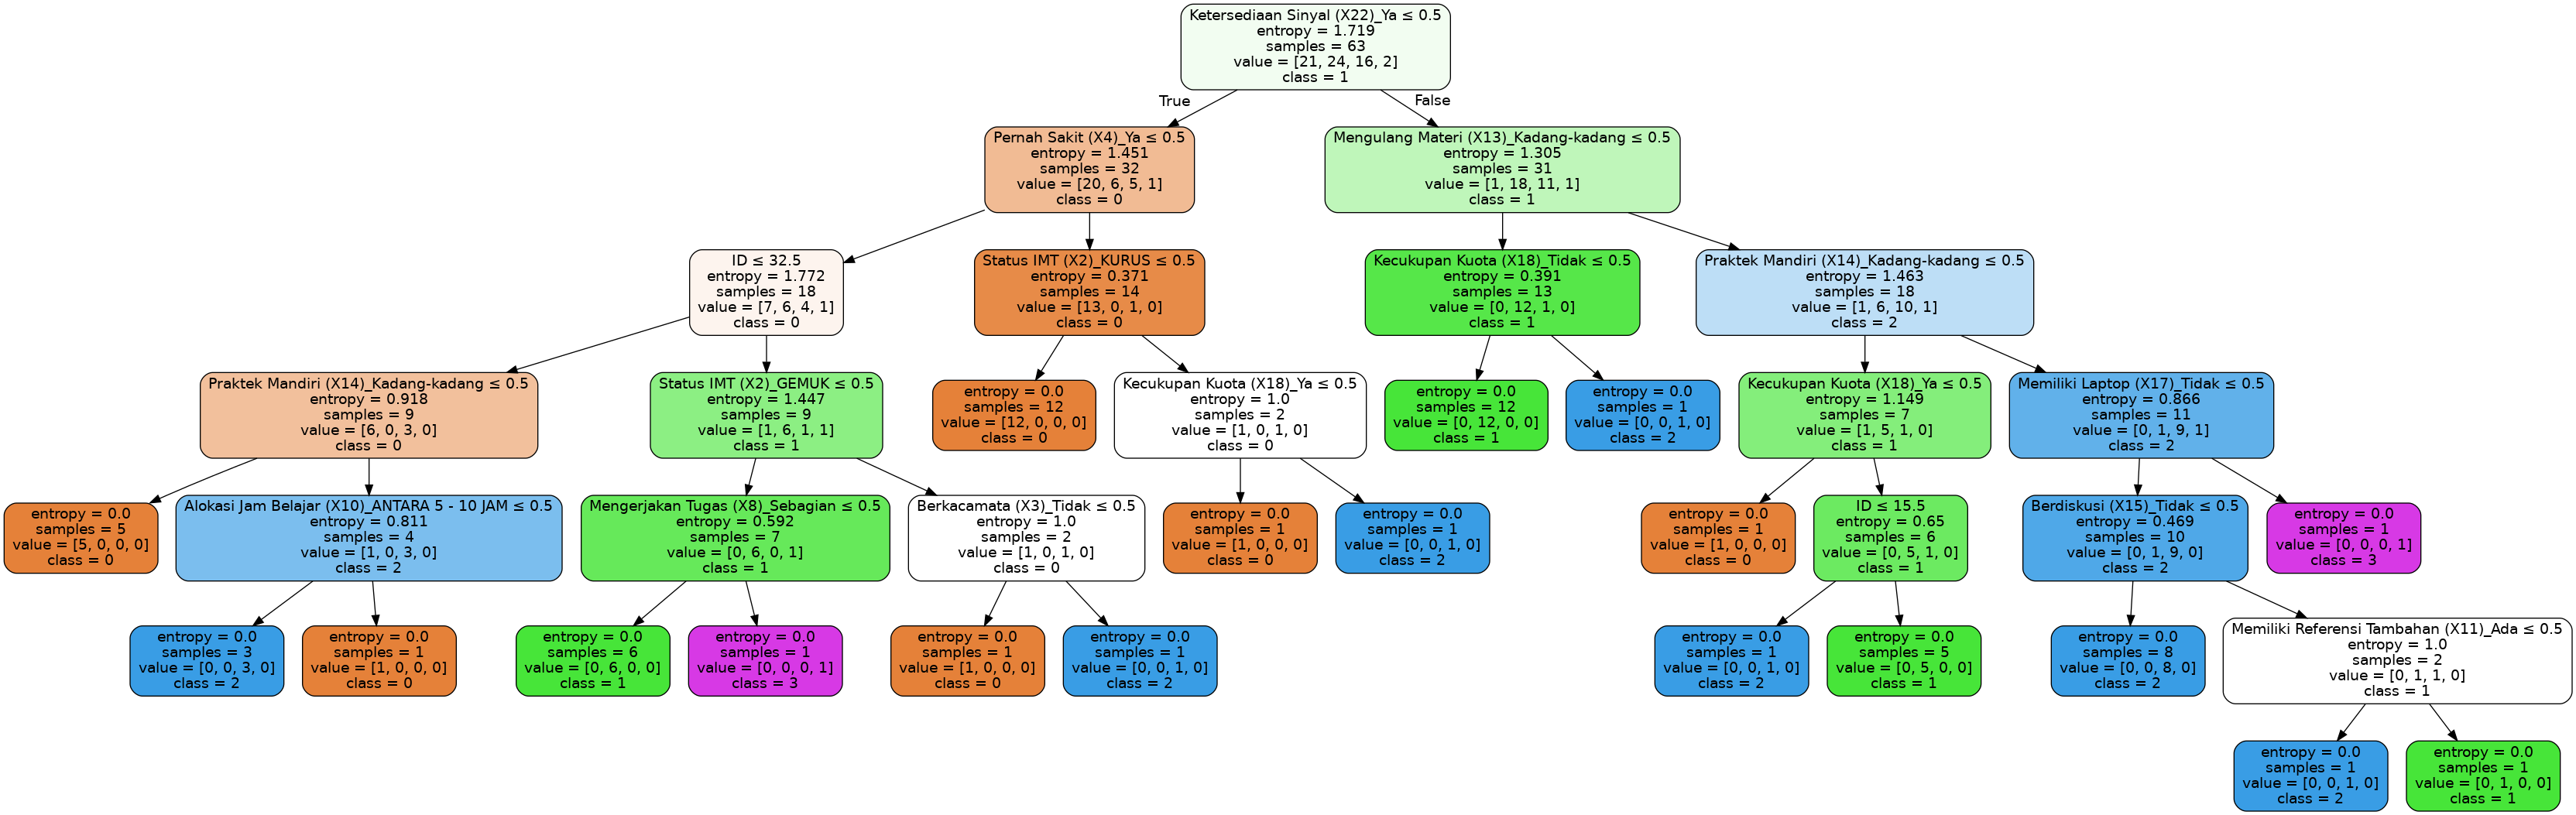

In [8]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, 
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_named, class_names=['0','1', '2', '3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('../output/entropyImg.png')
Image(graph.create_png())

In [9]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# print(X_test)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5714285714285714


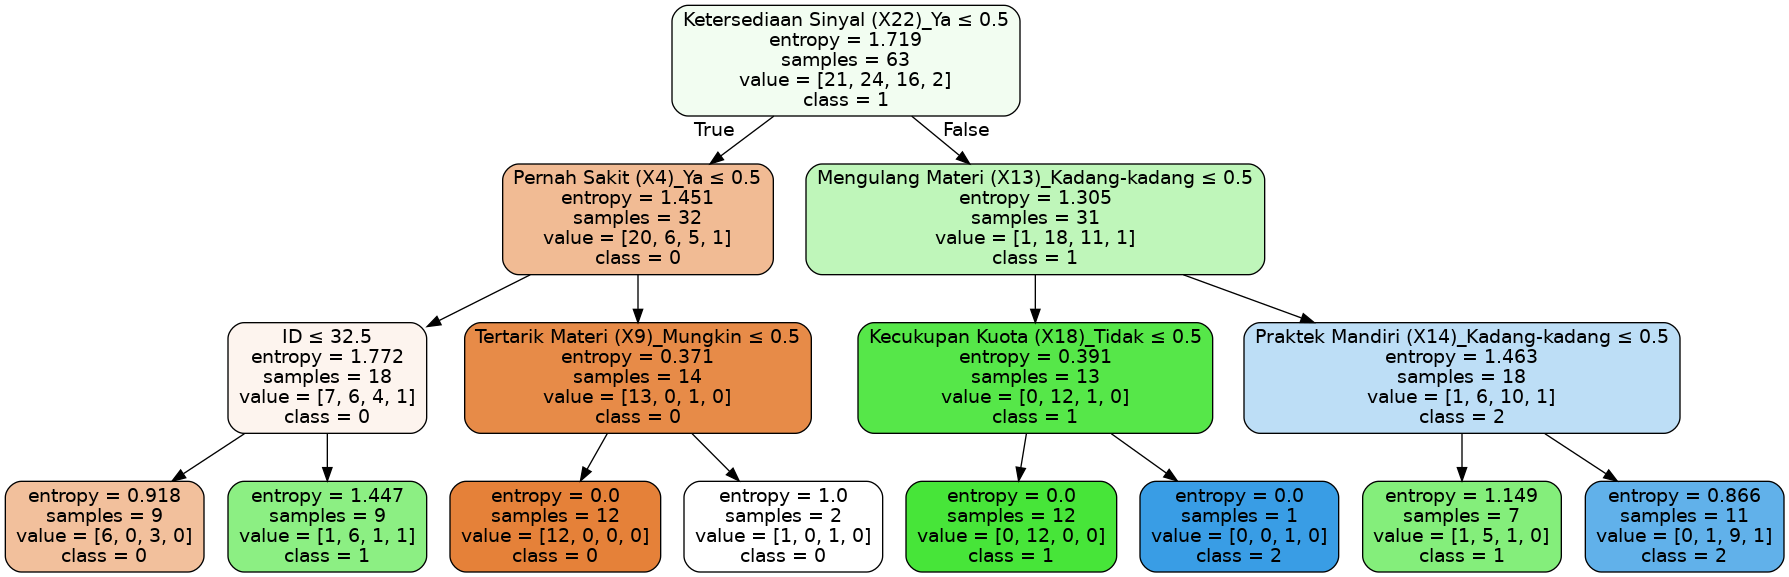

In [10]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, 
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_named, class_names=['0','1', '2', '3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('entropy-3.png')
Image(graph.create_png())